# Nico Pollack
# Applied Data Science Project
# May 9th, 2019



# Motivation and Goals

The goal of this project is to develop an algorithm that leverages data collected from the National Health and Nutrition Examination Survey 2013 – 2014 and analyzes the relationship between several variables and diabetes mellitus. This will not be an exact replication of work previously done but the beginning is similar in structure (for learning purposes) and in an attempt to replicate work made by “Jinner”.  In addition to statistically analyzing the correlation between diabetes with gender, years living in the United States, Family Income, arm circumference, grip strength, and being breast fed as a newborn, alternative variables to include physical activity per day, tobacco smoking habits, and alcohol consumption habits will be considered to provide information regarding life-style choices of individuals living with diabetes.

Questions to consider and significance:
-	What statistical significance is there between the prevalence of diabetes with physical activity?
-	What statistical significance is there between the prevalence of diabetes with tobacco smoking?
-	What statistical significance is there between the prevalence of diabetes with alcohol consumption?
-	What other variables could be studied in future analyses to further understand the lifestyle habits of individuals with diabetes?

 In the United States, it is estimated that 30.3 million people have diabetes – 9.4% of the total population2. This disease is deadly and costly, and vast efforts are made every year to better understand the disease to lower its prevalence and improve the well-being of individuals affected by the illness. While there is no cure for diabetes, victims can improve the quality of their lives by living healthier lives. This study aims to provide insights coinciding with the living habits of people living with the disease. Specifically, vices like tobacco use and alcohol consumption are (commonly) understood to have negative influences on long-term health while physical activity is linked to having more positive impacts.  Understanding the relationship between living habits and individuals with diabetes can be used to form hypotheses regarding the population’s willingness to treat their body well and ultimately take actions in the future to improve their long-term health. This data would be valued by health care providers and professionals to more accurately form realistic expectations for individuals to act in a way to improve their long-term health despite living with the limiting disease.  It should be understood that a variety of other variables should be analyzed to develop more accurate hypotheses – this study aims at specifically analyzing the average physical activity, tobacco use, and alcohol consumption as a component to the initiative.

# Data Provenance 

The National Health and Nutrition Examination Survey (NHANES) is a program of studies designed to assess the health and nutritional status of adults and children in the United States. The survey is unique in that it combines interviews and physical examinations. NHANES is a major program of the National Center for Health Statistics (NCHS). NCHS is part of the Centers for Disease Control and Prevention (CDC) and has the responsibility for producing vital and health statistics for the Nation - on average, NHANES surveys and tests 5,000 persons in the United States per year. 


## Please See Appendix for the datasheet for my dataset

In [481]:
import numpy as np 
import pandas as pd 
from subprocess import check_output
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import os
%matplotlib inline


#Importing datasets from NHANES
df1 = pd.read_csv('labs.csv')
df2 = pd.read_csv('examination.csv')
df3 = pd.read_csv('demographic.csv')
df4 = pd.read_csv('diet.csv')
df5 = pd.read_csv('questionnaire.csv')

# Preprocessing

After reading in the data, a concatenated dataframe was created using the same procedure as "Jinner."  To be further discussed later in this notebook - Jinner made an error while concatenating the csv files. In order to illustrate this, the 'SEQN' variable (patient ID number) was not dropped from the new, concatenated data frame.

Data defined:
ID - unique patient signature
Diabetes_known - question on survey: Have you even been told by a medical professional that you have or are at risk of diabetes?
Intense_PAperDay - average time spent per day on intense physical activity (in minutes)
Moderate_PAperDay - average time spent per day on moderate physical activity (in minutes)
Current_smoker - smoking habits: everyday, sometimes, never
Drinks_per_Occasion - average number of drinks per occasion
Gender - gender
Year_in_US - number of years living in the United States
Family_income - annual salary
GlycoHemoglobin - concenration of blood cells with glucose bound
ArmCircum - Circumference of upper arm
SaggitalAbdominal - Measure of stomach sag 
GripStrength - force of grip
Breast_fed - was subject breast fed as an infant?

A complete variable dictionary can be found - https://wwwn.cdc.gov/Nchs/Nhanes/Search/DataPage.aspx?Component=Questionnaire&CycleBeginYear=2013

In [482]:
#Getting rid of redundant patient ID numbers

#df2.drop(['SEQN'], axis = 1, inplace=True)
#df3.drop(['SEQN'], axis = 1, inplace=True)
#df4.drop(['SEQN'], axis = 1, inplace=True)
#df5.drop(['SEQN'], axis = 1, inplace=True)

#Creates one big matrix of patient data

df = pd.concat([df1, df2], axis=1, join='inner')
df = pd.concat([df, df3], axis=1, join='inner')
df = pd.concat([df, df4], axis=1, join='inner')
df = pd.concat([df, df5], axis=1, join='inner')


#Giving variables conventional names

df = df.rename(columns = {'SEQN' : 'ID',
                          'DIQ010' : 'Diabetes_known', #1 means yes, 2 means no, 3 means boarderline, part of novel analysis
                          'PAD660' : 'Intense_PAperDay', #Intense physical activity per day in minutes, part of novel analysis
                          'PAD675' : 'Moderate_PAperDay', #Moderate physical activity per day in minutes, part of novel analysis
                          'SMQ040' : 'Current_Smoker', #1 means everyday, 2 means sometimes, 3 means never, part of novel analysis
                          'ALQ130' : 'Drinks_per_Occasion', #part of novel analysis
                          'RIAGENDR' : 'Gender',
                          'DMDYRSUS' : 'Years_in_US', #NaN --> American
                          'INDFMPIR' : 'Family_income',
                          'LBXGH' : 'GlycoHemoglobin',
                          'BMXARMC' : 'ArmCircum',
                          'BMDAVSAD' : 'SaggitalAbdominal',
                          'MGDCGSZ' : 'GripStrength',
                          'DRABF' : 'Breast_fed'})

#Creating data frame with desired variables for analysis

df = df.loc[:, ['ID', 'Diabetes_known', 'Intense_PAperDay', 'Moderate_PAperDay', 'Current_Smoker', 'Drinks_per_Occasion','Gender', 'Years_in_US', 'Family_income','GlycoHemoglobin', 'ArmCircum', 
                'SaggitalAbdominal', 'GripStrength', 'Breast_fed']]

df.describe()


,ID,ID,ID,ID,ID,Diabetes_known,Intense_PAperDay,Moderate_PAperDay,Current_Smoker,Drinks_per_Occasion,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed
count,9815.000000,9815.000000,9815.00000,9815.000000,9815.00000,9424.000000,1980.000000,2944.000000,2484.000000,3463.000000,9815.000000,1837.000000,9053.000000,6643.000000,9301.000000,7218.000000,7677.000000,8661.000000
mean,78643.525318,78643.525318,78464.00000,78643.525318,78464.00000,1.947156,87.268687,63.215693,2.138889,3.534796,1.509424,8.933043,2.252947,5.642556,28.485765,21.114034,63.054891,1.984528
std,2939.186569,2939.186569,2833.49078,2939.186569,2833.49078,0.346552,320.200647,59.952960,0.941948,29.410605,0.499937,17.787060,1.635311,1.004850,7.961971,4.963949,25.098439,0.123426
min,73557.000000,73557.000000,73557.00000,73557.000000,73557.00000,1.000000,10.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.500000,10.400000,10.100000,8.000000,1.000000
25%,76090.500000,76090.500000,76010.50000,76090.500000,76010.50000,2.000000,40.000000,30.000000,1.000000,1.000000,1.000000,3.000000,0.870000,5.200000,22.600000,17.300000,45.600000,2.000000
50%,78642.000000,78642.000000,78464.00000,78642.000000,78464.00000,2.000000,60.000000,60.000000,3.000000,2.000000,2.000000,5.000000,1.710000,5.400000,29.300000,20.700000,60.300000,2.000000
75%,81190.500000,81190.500000,80917.50000,81190.500000,80917.50000,2.000000,120.000000,60.000000,3.000000,3.000000,2.000000,7.000000,3.610000,5.800000,34.000000,24.400000,80.700000,2.000000
max,83731.000000,83731.000000,83371.00000,83731.000000,83371.00000,9.000000,9999.000000,900.000000,3.000000,999.000000,2.000000,99.000000,5.000000,17.500000,59.400000,40.100000,162.800000,2.000000


#  Cleaning

Patients with data missing from the questionaire pertaining to Diabetes_know, Current_Smoker, and Drinks_per_Occasion were dropped to focus analysis.  Physical Activity NaNs were determined to be zeros. Glycohemoglobin, SaggitalAbdominal, ArmCircum, and GripStrenth NaNs were all replaced with the median value of the dataset to avoid severly skewing results. Family_income NaNs were filled using the ffill method, and Breast_fed NaNs were set to 1.

According to WebMD (https://www.webmd.com/diabetes/guide/glycated-hemoglobin-test-hba1c), a glycohemoglobin percentage between 5.7% and 6.4% means an individual is at risk for diabetes. Anything above means the individual almost certainly has diabetes. A new variable was created 'Diabetes,' based on this assumption to be compared with the questionaire results. Additionally, the survey results had to be modified to 0, 0.5, and 1 for no diabetes, at risk, and patient has diabetes in order for the represented data to make sense in later correlational analysis. 

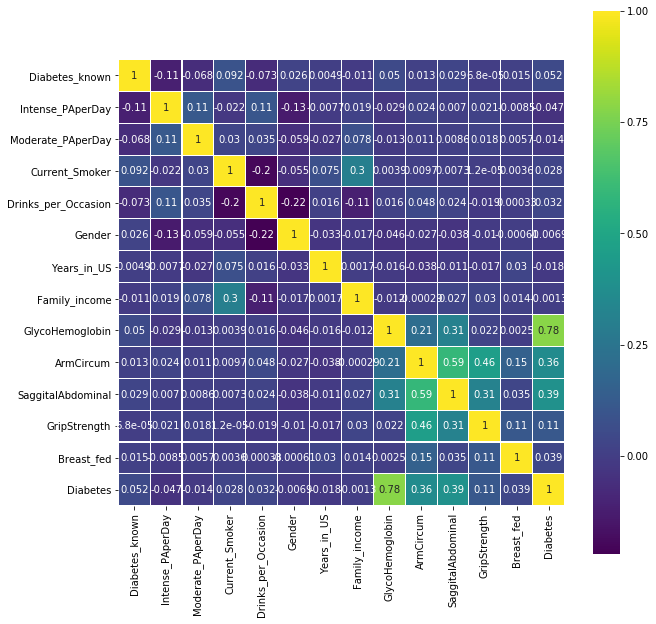

In [483]:

df = df.dropna(subset=['Diabetes_known', 'Current_Smoker', 'Drinks_per_Occasion'])

df.dropna(axis=1, how='all')
df.dropna(axis=0, how='all')

df['Intense_PAperDay'] = df['Intense_PAperDay'].fillna(value = 0)
df['Moderate_PAperDay'] = df['Moderate_PAperDay'].fillna(value = 0)

#year in us -> american : 0, not american : 1

df['Years_in_US'] = df['Years_in_US'].apply(lambda x: x if x > 0 else 0)

#GlycoHemoglobin, Saggital Abdominal(median)
df['GlycoHemoglobin'] = df['GlycoHemoglobin'].fillna(df['GlycoHemoglobin'].median())
df['SaggitalAbdominal'] = df['SaggitalAbdominal'].fillna(df['SaggitalAbdominal'].median())
df['ArmCircum'] = df['ArmCircum'].fillna(df['ArmCircum'].median())
df['GripStrength'] = df['GripStrength'].fillna(df['GripStrength'].median())

#Family Income -> use ffill to fill na
df['Family_income'] = df['Family_income'].fillna(method='ffill')

#Breast_fed -> fill to 1
df['Breast_fed'] = df['Breast_fed'].fillna(value = 1)


df.loc[df['GlycoHemoglobin'] < 5.7, 'Diabetes'] = 0
df.loc[(df['GlycoHemoglobin'] >= 5.7) & (df['GlycoHemoglobin'] <= 6.4), 'Diabetes'] = 0.5
df.loc[df['GlycoHemoglobin'] >= 6.5, 'Diabetes'] = 1

df.loc[df['Diabetes_known'] == 2, 'Diabetes_known'] = 0
df.loc[df['Diabetes_known'] == 3, 'Diabetes_known'] = 0.5
df.loc[df['Diabetes_known'] == 9, 'Diabetes_known'] = 0  #Only a single entry


df.loc[df['Drinks_per_Occasion'] < 1, 'Drinks_per_Occasion'] = 0
df.loc[(df['Drinks_per_Occasion'] >= 1) & (df['Drinks_per_Occasion'] <= 2), 'Drinks_per_Occasion'] = 0.5
df.loc[df['Drinks_per_Occasion'] > 2, 'Drinks_per_Occasion'] = 1

colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
sns.heatmap(df.astype(float).drop(axis=1, labels='ID').corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)


# Exploratory Data Analysis

The correlational heatmap above was used to provide insight into the fidelity of Jinner's analysis. Almost immidiately, an obvious issue was noted - there was a negligable correlation between 'Diabetes,' which is a function of the glycohemoglobin concentration and 'Diabetes_known' which is the result of the diabetes question on the questionaire. Initially, value.counts was used to investigate the relative number of each entry. Following, a forloop was created to count the occurance of each vairable properly matching up. Considering the value.counts alluded to greater than 80% of the sample population not having diabetes, this was an issue. 

This is where the investigator discovered the error publicized by Jinner on Kaggle. Upon keeping the patient ID number for each concatenated dataset, it was uncovered that the patiet IDs were not properly merged. This error was corrected for by using the pd.merge function on 'SEQN'

In [484]:
#There should be a stronger relationship between Diabetes and Diabetes_known
print(df['Diabetes'].value_counts())
print(df['Diabetes_known'].value_counts())

# print(df['Diabetes_known'])
#Now know that indices are skipped, so can't use indexed for loop
df.reset_index(inplace=True)

i = 0
not_equal = 0
equal = 0
for x in df['Diabetes']:
    if df['Diabetes_known'][i] == x:
        equal += 1
    else:
        not_equal += 1
        
    i += 1
print('Number not equal:')
print(not_equal)
print('Number equal:')
print(equal)

#Turns out IDs do not match up

0.0    1288
0.5     233
1.0     104
Name: Diabetes, dtype: int64
0.0    1409
1.0     174
0.5      42
Name: Diabetes_known, dtype: int64
Number not equal:
479
Number equal:
1146


In [485]:
print(df.head(22))

    index     ID     ID     ID     ID     ID  Diabetes_known  \
0       0  73557  73557  73557  73557  73557             1.0   
1       1  73558  73558  73558  73558  73558             1.0   
2       5  73562  73562  73562  73562  73562             0.0   
3       9  73566  73566  73566  73566  73566             0.0   
4      10  73567  73567  73567  73567  73567             0.0   
5      20  73577  73577  73577  73577  73577             0.0   
6      38  73595  73595  73595  73595  73595             0.0   
7      39  73596  73596  73596  73596  73596             0.0   
8      41  73598  73598  73598  73598  73598             0.0   
9      43  73600  73600  73600  73600  73600             0.0   
10     47  73604  73604  73604  73604  73604             0.0   
11     58  73615  73615  73615  73615  73615             1.0   
12     59  73616  73616  73616  73616  73616             0.0   
13     62  73619  73619  73619  73619  73619             0.0   
14     64  73621  73621  73621  73621  7

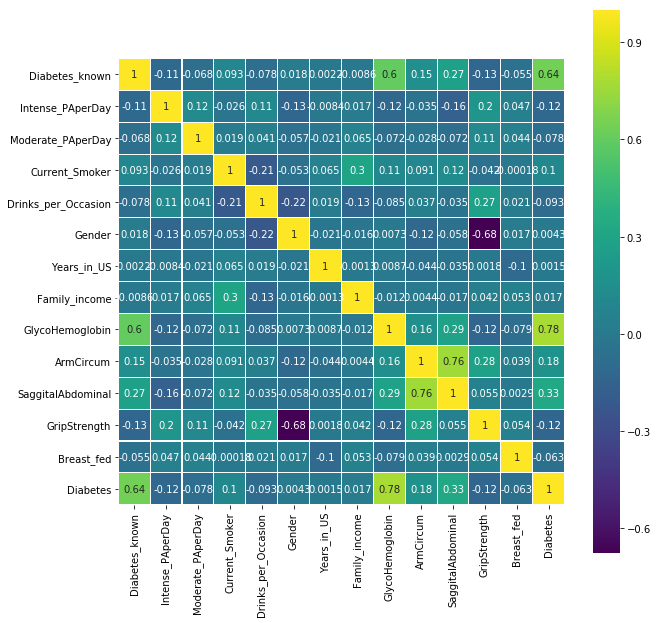

In [486]:
df11 = pd.merge(df1,df2, on='SEQN')
df12 = pd.merge(df11,df3, on='SEQN')
df13 = pd.merge(df12,df4, on='SEQN')
df = pd.merge(df13,df5, on='SEQN')



#Creates df with conventional names 

df = df.rename(columns = {'SEQN' : 'ID',
                          'DIQ010' : 'Diabetes_known', #1 means yes, 2 means no, 3 means boarderline, part of novel analysis
                          'PAD660' : 'Intense_PAperDay', #Intense physical activity per day in minutes, part of novel analysis
                          'PAD675' : 'Moderate_PAperDay', #Moderate physical activity per day in minutes, part of novel analysis
                          'SMQ040' : 'Current_Smoker', #1 means everyday, 2 means sometimes, 3 means never, part of novel analysis
                          'ALQ130' : 'Drinks_per_Occasion', #part of novel analysis
                          'RIAGENDR' : 'Gender',
                          'DMDYRSUS' : 'Years_in_US', #NaN --> American
                          'INDFMPIR' : 'Family_income',
                          'LBXGH' : 'GlycoHemoglobin',
                          'BMXARMC' : 'ArmCircum',
                          'BMDAVSAD' : 'SaggitalAbdominal',
                          'MGDCGSZ' : 'GripStrength',
                          'DRABF' : 'Breast_fed'})

df = df.loc[:, ['ID', 'Diabetes_known', 'Intense_PAperDay', 'Moderate_PAperDay', 'Current_Smoker', 'Drinks_per_Occasion','Gender', 'Years_in_US', 'Family_income','GlycoHemoglobin', 'ArmCircum', 
                'SaggitalAbdominal', 'GripStrength', 'Breast_fed']]


df = df.dropna(subset=['Diabetes_known', 'Current_Smoker', 'Drinks_per_Occasion'])

df.dropna(axis=1, how='all')
df.dropna(axis=0, how='all')

df['Intense_PAperDay'] = df['Intense_PAperDay'].fillna(value = 0)
df['Moderate_PAperDay'] = df['Moderate_PAperDay'].fillna(value = 0)

#year in us -> american : 0, not american : 1

df['Years_in_US'] = df['Years_in_US'].apply(lambda x: x if x > 0 else 0)

#GlycoHemoglobin, Saggital Abdominal(median)
df['GlycoHemoglobin'] = df['GlycoHemoglobin'].fillna(df['GlycoHemoglobin'].median())
df['SaggitalAbdominal'] = df['SaggitalAbdominal'].fillna(df['SaggitalAbdominal'].median())
df['ArmCircum'] = df['ArmCircum'].fillna(df['ArmCircum'].median())
df['GripStrength'] = df['GripStrength'].fillna(df['GripStrength'].median())

#Family Income -> use ffill to fill na
df['Family_income'] = df['Family_income'].fillna(method='ffill')

#Breast_fed -> fill to 1
df['Breast_fed'] = df['Breast_fed'].fillna(value = 1)



df.loc[df['GlycoHemoglobin'] < 6.0, 'Diabetes'] = 0
df.loc[(df['GlycoHemoglobin'] >= 6.0) & (df['GlycoHemoglobin'] <= 6.4), 'Diabetes'] = 0.5
df.loc[df['GlycoHemoglobin'] >= 6.5, 'Diabetes'] = 1

df.loc[df['Diabetes_known'] == 2, 'Diabetes_known'] = 0
df.loc[df['Diabetes_known'] == 3, 'Diabetes_known'] = 0.5
df.loc[df['Diabetes_known'] == 9, 'Diabetes_known'] = 0  #Only a single entry

df.loc[df['Drinks_per_Occasion'] < 1, 'Drinks_per_Occasion'] = 0
df.loc[(df['Drinks_per_Occasion'] >= 1) & (df['Drinks_per_Occasion'] <= 2), 'Drinks_per_Occasion'] = 0.5
df.loc[df['Drinks_per_Occasion'] > 2, 'Drinks_per_Occasion'] = 1

df.describe()

colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
sns.heatmap(df.astype(float).drop(axis=1, labels='ID').corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)


After fixing the concatenation error, the correlation between Diabetes_known and Diabetes (along with most other variables) is much more significant. Additionally, stronger relationships are now seen between Diabetes and "fat" noticed by its relationship between arm circumference and stomach sag.

In regards to the novelty of this analysis - considering physical activity, smoking habits, and drinking habits, smoking habits had its largest correlation with family income, and not surprisingly physical activity had its highest correlation with grip strength. The most unusual relatively high correlation is between drinks per occasion and grip strength; this could potentially be worth investigating futher in another study. 

# Creating a Machine Learning Model
In order to properly fit a multi-dimensional model to predict Diabetes_known, the target (to be predicted) needed to have categorical values rather than coninuous. Below you can see how this was taken care of:

In [487]:
#Create categorical variable for classifier
df.loc[df['Diabetes_known'] == 1, 'Target'] = 2 #Diabetes = Yes
df.loc[df['Diabetes_known'] == 0, 'Target'] = 0 #Diabetes = no
df.loc[df['Diabetes_known'] == .5, 'Target'] = 1 #Diabetes = maybe

Below, the 'target' data is set to be the dependent vairable of the model with the training variables selected in training_variables as the inputs. Note that glycohemoglobin was removed. This is because models created with glycohemoglobin as an input resulted significant accuracy due to the understood dependence of diabetes with glycohemoglobin concentration - ultimately this was found to be a dishonest way to create a diabetes predicting model and shifted the focus from the initial goal of analyzing the relationships between diabetes and the lifestyle choices associated with physical activity and vices like aclohol and tobacco consumption. It should be noted that a random forrest classifier was used, so a new model is created everytime this notebook is processed. The only consistent data is the final figure that speaks to the relative feature importance of each variable in defining the model.  This will be discussed further in the conclusion. 

In [488]:
#Splitting data into training, test, and validation set

from sklearn.model_selection import train_test_split

y = df['Target']
training_variables = ['Intense_PAperDay', 'Moderate_PAperDay', 'Current_Smoker', 'Drinks_per_Occasion','Gender', 'Years_in_US', 'Family_income', 'ArmCircum', 
                'SaggitalAbdominal', 'GripStrength', 'Breast_fed']

X_train, X_test, y_train, y_test = train_test_split(df[training_variables],
                 y, test_size=0.2)


In [489]:
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import l1_min_c
from sklearn.metrics import roc_curve, auc
rf = RandomForestClassifier()
param_dist = {"n_estimators": stats.randint(2, 300),
              "max_features": ['sqrt',  'log2'],
              "min_samples_split": stats.randint(5, 50),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
random_rf = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=20, cv=10, verbose=1, n_jobs=-1)
random_rf.fit(X_train, y_train)


Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   31.1s finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021686E0BEF0>, 'max_features': ['sqrt', 'log2'], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021686E0BE80>, 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=Non

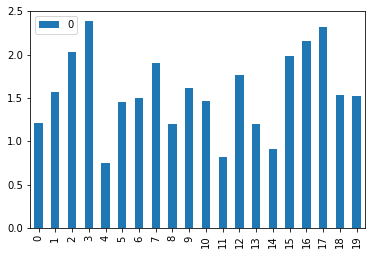

In [490]:
pd.DataFrame(random_rf.cv_results_['std_test_score'] * 100).plot(kind='bar') 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


Text(0.5, 1.0, 'Average Accuracy for Train and Test Data')

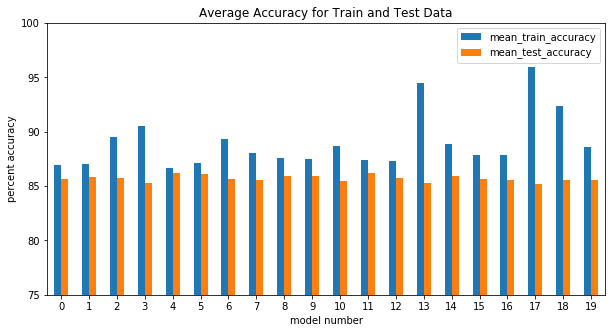

In [491]:
train_test_results = pd.DataFrame([random_rf.cv_results_['mean_train_score'],
                                   random_rf.cv_results_['mean_test_score']]).T * 100
train_test_results.columns = ['mean_train_accuracy', 'mean_test_accuracy']
f, ax = plt.subplots(figsize=(10,5))
train_test_results.plot(kind='bar', ax=ax)
plt.xticks(rotation=0, horizontalalignment='center')
plt.legend(loc=0)
plt.ylim(75, 100)
plt.xlabel('model number')
plt.ylabel('percent accuracy')
plt.title('Average Accuracy for Train and Test Data')

Text(0.5, 1.0, 'Difference in Test Accuracy Compared Train Accuracy')

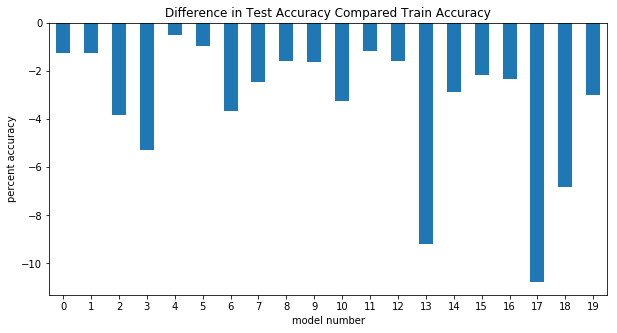

In [492]:
f, ax = plt.subplots(figsize=(10,5))
pd.DataFrame(train_test_results['mean_test_accuracy'] - train_test_results['mean_train_accuracy'])\
.plot(kind='bar', ax=ax)
plt.xticks(rotation=0, horizontalalignment='center')
ax.get_legend().remove()
plt.xlabel('model number')
plt.ylabel('percent accuracy')
plt.title('Difference in Test Accuracy Compared Train Accuracy')

In [493]:
random_rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=42,
            min_weight_fraction_leaf=0.0, n_estimators=244, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [494]:
random_rf.best_score_

0.8619153674832962

In [495]:
random_rf.score(X_test, y_test)

0.8902077151335311

In [496]:
random_rf.best_estimator_.predict_proba(np.array([[20, 20, 1, 1, 1, 1, 1, 0, 0,0,0]]))

array([[0.81663998, 0.03431283, 0.14904719]])

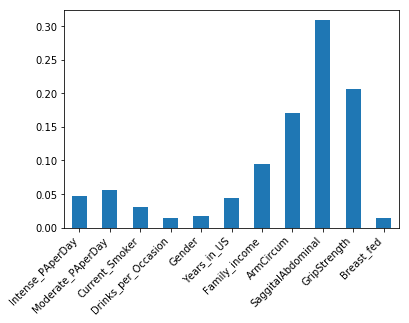

In [497]:
#Checkout feature importance 
ax = pd.DataFrame(random_rf.best_estimator_.feature_importances_).plot(kind='bar')
ax.set_xticklabels(training_variables, rotation = 45, ha="right")
ax.get_legend().remove()

# Conclusion and Learning Outcomes

The Random Forrest  algorithm involves significant randomizations, thus test accuracy and model iterations produce varied results upon running testing and training the data. For a more consistent model, much more data need to be used so that the variance between runs statistically barely changes. Due to the ambiguity, this study should only be used to potentially create new hyptheses. 

Not surprisingly, the model was found to fit best when variables associated with fat were more heavily weighted. Based on the way the data was represented in this study, gender, drinks per occasion, and breast feeding were the least contributive to the model fitting well. Of all the additional training variables added to this study, physical activity had a relatively significant impact on the model compared to the negligible variables mentioned. That being said, family income and grip strength had significantly more of a role to play. 

In the future, it would be interesting to analyze the data collected in NHANES over the past few decades up until today. It is very possible that Health Economics Outcomes Research could benefit from these studies analyzing multiple facets of the surveys / laboratory tests as society and technology have progressed - continued into the future as well.  



Some things I learned:
- The importance of researchers validating one anothers' work
- The impact of misrepresenting data
- Syntax and functions in python
- Visualizations in pandas
- The concepts, methodologies, and ease of fitting a supervised machine learnig model to multi-dimensional data and creating & analyzing various types of models

# Appendix.

# Datasheet


Dataset: National Health and Nutrition Examination Survey 2013 - 2014
https://www.kaggle.com/cdc/national-health-and-nutrition-examination-survey/kernels


Motivation:
- For what purpose was the dataset created?
- It was created to assess the health and nutritional status of adults and children in the United States, and it is unique in that it combines interviews and physical examinations.
- Who created the dataset? And on behalf of which entity?
- National Center for Health Statistics (NCHS) created it on behalf of the Center for Disease Control and Prevention (CDC)
- Who funded the creation of the dataset?
- The United States government. 

- Composition:
- What do the instances that comprise the dataset represent?
- The data set contains six separates .csv data sets – on demographics, diet, examination, labs, medications, and a questionnaire. 
- How many instances are there in total (of each type)?
- Demographics – 10.2k x 47
- Diet – 9813 x 168
- Examination – 9813 x 224 
- Labs – 9813 x 424
- Medications – 20.2k x 13
- Questionnaire – 10.2k x 953
- Does the dataset contain all possible instances or is it a sample from a larger dataset?
- Contains all instances for the year 2013 - 2014
- What data does each instance consist of?
- Specific tests, information, answers to questions, etc. 
- Is there a label or target associated with each instance?
- Yes.
- Is any information missing from individual instances?
- Possibly; the SEQN (or ID system) does not increase by 1 in a few instances. 
- Are relationships between individual instances made explicit?
- Not all the time.  Only follow up questions / tests; none made in between datasets 
- Are there recommended data splits?
- No.
- Are there any errors, sources of noise, or redundancies in the dataset?
- Potentially missing, or mislabeled, data.
- Is the dataset self-contained, or does it link to or otherwise rely on external resources?
- Self-contained. 
- Does the dataset contain data that might be considered confidential?
- No – tested individuals are not identified. 
- Does the dataset contain data that, if viewed directly, might be offensive, insulting, threatening, or might otherwise cause anxiety?
- No.
- Does the dataset relate to people?
- Yes.
- Does the dataset identify any subpopulations?
- Yes – there is a full demographic dataset characterizing individual patients.
- Is it possible to identify individuals, either directly or indirectly, from the dataset?
- No.
- Does the dataset contain data that might be considered sensitive in any way?
- No.

- Collection Process:
- How was the data associated with each instance acquired?
- Data was collected by medical professionals partly as an in-person survey and partially as laboratory tests.

- What mechanisms or procedures were used to collect the data?
- If the dataset is a sample from a larger set, what was the sampling strategy?
- No.
- Who was involved in the data collection process and how were the compensated?
- Study team consists of a physician, medical and health technicians, and dietary and health interviewers
- Over what timeframe was the data collected?
- 2013 -2014
- Were any ethical review processes conducted?
- No. 
- Does the dataset relate to people?
- Yes – it is patient data. 
- Did you collect the data from the individuals in question directly?
- No. 
- Were the individuals in question notified about the data collection?
- Yes – participants received compensation and a report of medical findings. 
- Did the individuals in question consent to the collection and use of their data?
- Yes.
- If consent was obtained, were the consenting individuals provided with a mechanism to revoke their consent in the future or for certain uses?
- No.
- Has an analysis of the potential impact of the dataset and its use on data subjects been conducted?
- No – not on the dataset but on the medical tests.

- Preprocessing / cleaning / labeling:
- Was any preprocessing/cleaning/labeling of the data done?
- Data is labeled.
- Was the “raw” data saved in addition to the preprocessed/cleaned/labeled data?
- Yes – but it is not clear where.
- Is the software used to preprocess/clean/label the instances available?
- No

- Uses:
- Has the dataset been used for any tasks already?
- Yes – extensive research done by universities, health care providers, educators, and government organizations.
- Is there a repository that links to any or all papers or systems that use the dataset?
- Yes – related sites on their website to include: NHANES Longitudinal Study, NHANES National Youth Fitness Survey, Growth Charts, and Research Data Center.
- What other tasks could the dataset be used for?
- Any patient data research coinciding with the gigabytes of data collected
- Is there anything about the composition of the dataset that might impact future uses?
- Missing data / ambiguity with the ID (SEQN) numbers
- Are there tasks for which the dataset should not be used?
- N/a
- Distribution
- Will the dataset be distributed to third parties?
- Dataset is publicly available for anyone to download. 
- How will the dataset be distributed?
- N/a
- When will the dataset be distributed?
- N/a
- Will the dataset be distributed under an IP license and have terms of use?
- No.
- Have any third parties-imposed IP-based or other restrictions on the data associated with the instances?
- No.
- Do any export controls or other regulatory restrictions apply to the dataset?
- Nothing noted. 
- Maintenance
- Who will be supporting/hosting/maintaining the dataset?
- The NCHS  controlled by the CDC.
- How can the owner/curator/manager of the dataset be contacted?
- 1600 Clifton Road Atlanta, GA 30329-4027 USA 
- 800-CDC-INFO (800-232-4636), TTY: 888-232-6348
- Email CDC-INFO
- Is there an erratum?
- Sequence numbers could be sources of error.
- Will the dataset be updated?
- No but the same survey / examination is done every year. 
- If the dataset relates to people, are there applicable limits on the retention of the data associated with the instances?
- No.
- Will older versions of the dataset continue to be supported/hosted/maintained?
- Yes. 
- Is there a mechanism for others to extend/augment/build on the dataset?
- Individually yes, but third-parties cannot modify the data coming from the NHANES website. 
- Any other comments?
 - n/a

